In [1]:
#臉部辨識
from sklearn import datasets
data=datasets.fetch_olivetti_faces()
print(data.DESCR)
print(data.target)
print(data.data)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\1234\scikit_learn_data
Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
data=datasets.fetch_olivetti_faces()
#print(data.DESCR)
#print(data.target)
#print(data.data)
plt.imshow(data.images[0],interpolation='nearest')
plt.show()
plt.imshow(data.images[6],cmap='autumn',interpolation='nearest') #cmap顏色 :https://www.cnblogs.com/denny402/p/5122594.html
plt.show()

In [3]:
from sklearn import datasets
#import matplotlib.pyplot as plt
data=datasets.fetch_olivetti_faces()
#把影像變成一列
targets=data.target
data=data.images.reshape(len(data.images),-1)
#訓練資料30張臉(300張圖片)，測試資料10張臉(100張圖片)
train=data[targets<30]
test=data[targets>=30]
#從100張測試影像中，亂數選出5張出來，變數test的大小變成(5,4096)
n_faces=5
from sklearn.utils import check_random_state
rng =check_random_state(4)
face_ids =rng.randint(test.shape[0],size=(n_faces, ))
test=test[face_ids, :]
#把每張訓練影像和測試影像都切割成上下兩部分:X人臉上半部,Y人臉下半部
n_pixels=data.shape[1]
x_train = train[:,:(n_pixels + 1) // 2]
y_train = train[:,n_pixels // 2:]
x_test = test[:,:(n_pixels + 1) // 2]
y_test = test[:,n_pixels // 2:]
#決定預測的演算法
from sklearn.linear_model import LinearRegression
ESRIMATORS ={
    "LinearRegression":LinearRegression(),
}
y_test_predict = dict()
for name,estimator in ESRIMATORS.items():
    estimator.fit(x_train,y_train)#模型練習
    y_test_predict[name] =estimator.predict(x_test)

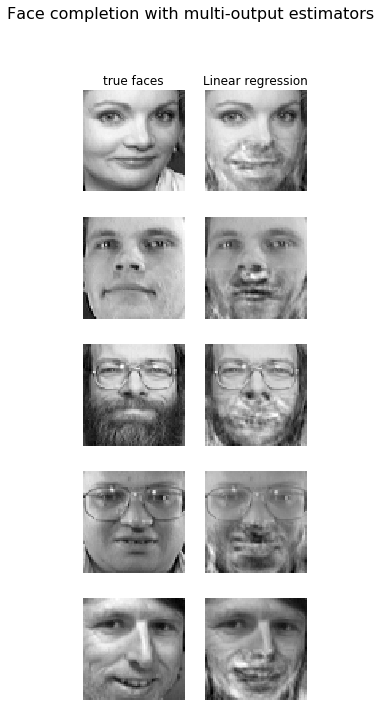

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
data=datasets.fetch_olivetti_faces()
#print(data.DESCR)
#print(data.target)
#print(data.data)
#plt.imshow(data.images[0],cmap='gray',interpolation='nearest')
#plt.show()
#把影像變成一列
targets=data.target
data=data.images.reshape(len(data.images),-1)
#訓練資料30張臉(300張圖片)，測試資料10張臉(100張圖片)
train=data[targets<30]
test=data[targets>=30]
# 從100張測試影像中,亂數選5張出來，變數test的大小變成(5,4096)
n_faces = 5
from sklearn.utils import check_random_state
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]
#把每張訓練影像和測試影像都切割成上下兩部分: X人臉上半部分
#， Y人臉下半部分。
n_pixels = data.shape[1]
X_train = train[:, :(n_pixels + 1) // 2]
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]
#決定預測的演算法
from sklearn.linear_model import LinearRegression
ESTIMATORS = {
    "Linear regression": LinearRegression(),
}
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train) #模型訓練
    y_test_predict[name] = estimator.predict(X_test) 
    #模型預測
# Plot the completed faces
image_shape = (64, 64)
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
plt.show()



In [6]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
diabetes =datasets.load_diabetes()
X_train,X_test,Y_train,Y_test=train_test_split(diabetes.data,diabetes.target,test_size=0.2)
print(len(X_train))#len →length 幾筆資料
print(len(X_test))
#print(diabetes.DESCR)
#print(diabetes.target)
#print(diabetes.data)

353
89


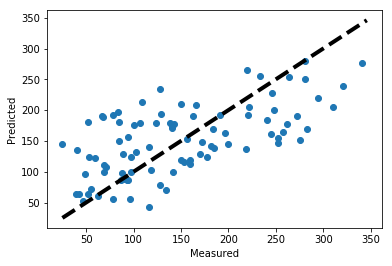

0.3842585213801909

In [7]:
from sklearn import datasets,linear_model
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
diabetes =datasets.load_diabetes()
X_train,X_test,Y_train,Y_test=train_test_split(diabetes.data,diabetes.target,test_size=0.2)
regr=linear_model.LinearRegression()
regr.fit(X_train,Y_train)
predicted =regr.predict(X_test)
plt.scatter(Y_test,predicted)
Y=diabetes.target
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'k--',lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()
regr.score(X_test,Y_test)

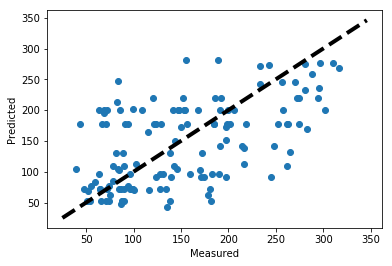

0.015037593984962405

In [8]:
from sklearn import datasets,linear_model
from sklearn import svm
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
diabetes =datasets.load_diabetes()
X_train,X_test,Y_train,Y_test=train_test_split(diabetes.data,diabetes.target,test_size=0.3)
svc_model =svm.SVC(gamma=0.1,C=100,kernel='linear')
svc_model.fit(X_train,Y_train)
predicted = svc_model.predict(X_test)
#以下為畫圖
plt.scatter(Y_test,predicted)
Y=diabetes.target
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'k--',lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()
svc_model.score(X_test,Y_test)